In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

pixar_movies = pd.read_csv("PixarMovies.csv")
rows = pixar_movies.shape[0]
cols = pixar_movies.shape[1]

print(pixar_movies.head(rows))


    Year Released                Movie  Length  RT Score  IMDB Score  \
0            1995            Toy Story      81       100         8.3   
1            1998         A Bug's Life      96        92         7.2   
2            1999          Toy Story 2      92       100         7.9   
3            2001       Monsters, Inc.      90        96         8.1   
4            2003         Finding Nemo     104        99         8.2   
5            2004      The Incredibles     115        97         8.0   
6            2006                 Cars     116        74         7.2   
7            2007          Ratatouille     111        96         8.0   
8            2008               WALL-E      97        96         8.4   
9            2009                   Up      96        98         8.3   
10           2010          Toy Story 3     103        99         8.4   
11           2011               Cars 2     113        39         6.3   
12           2012                Brave     100        78        

A printout of the rows and columns of the PixarMovies.csv dataset after reading it into the pixar_movies DataFrame object. The 'shape' function returns the dimensions of the DataFrame while passing in the total number of rows into head prints out each row.

In [2]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

Calling 'dtypes' on the DataFrame shows each of the columns' respective datatypes. 

In [3]:
pixar_movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


A 'description' of the dataset. For each numerical column we can see the mean, standard deviation, minimum value,25th percentile value, 50th percentile value, 75th percentile value, and maximum value.

In [4]:
pixar_movies['Domestic %'] = pixar_movies['Domestic %'].str.rstrip('%').astype('float')
pixar_movies['International %'] = pixar_movies['International %'].str.rstrip('%').astype('float')
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score']*10
filtered_pixar = pixar_movies.loc[0:13]



Here the 'Domestic %' and 'International %' columns are converted into floats so that they may be compared. The 'IMDB Score' column is scaled up by 10 to bring its data onto a scale of 100.

filtered_pixar is the pixar_movies database with the last row dropped since the data for the last movie, 'Inside Out', wasn't reliably available at this time.

In [5]:
pixar_movies.set_index('Movie',inplace=True)
filtered_pixar.set_index('Movie',inplace=True)

Here both of the DataFrames are set with an index of the 'Movie' column. The inplace attribute is set to True so that the DataFrames are altered as is instead of returning a new DataFrame object.

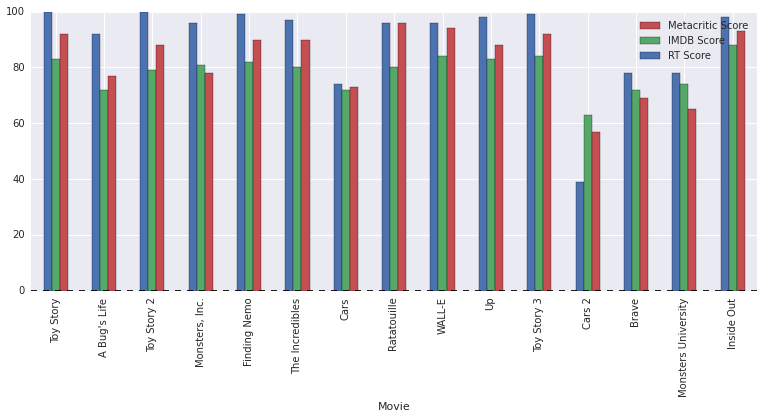

In [6]:
critics_reviews = pd.DataFrame(data=pixar_movies,columns=['RT Score','IMDB Score','Metacritic Score'])
critics_reviews.plot(kind='bar',rot=90,figsize=(13,5),legend='reverse')
plt.show()

The three movie score columns are plotted to see how they comparably rate the films. 

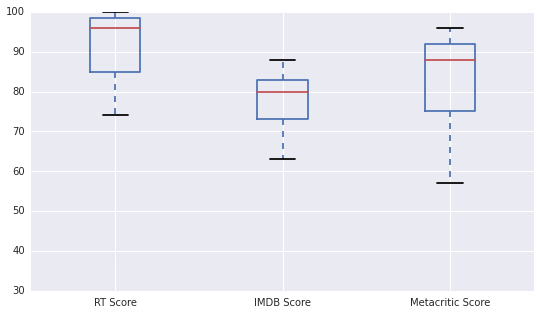

In [7]:
critics_reviews.plot(kind='box',figsize=(9,5))
plt.show()

Here a box plot shows the distrubution of scores based on the review source. Rotten Tomatoes tends to give higher scores to Pixar movies while Metacritic's scores are across a wider range.

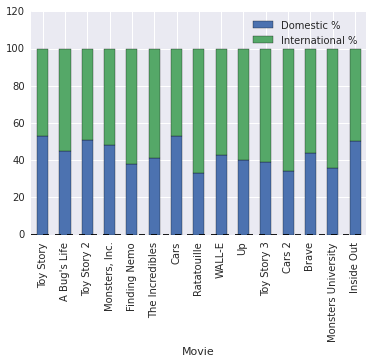

In [8]:
revenue_proportions = pd.DataFrame(data=pixar_movies,columns=['Domestic %','International %'])
revenue_proportions.plot(kind='bar',stacked=True)
plt.show()

A stacked bar graph shows the split between earning from domestic and international audiences. A quick look tells us that Ratatouille, Cars 2, and Monsters University had the highest percentage of their earnings internationally.

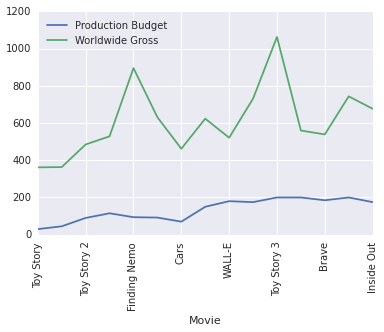

In [9]:
prod_gross = pd.DataFrame(data=pixar_movies,columns=['Production Budget','Worldwide Gross'])
prod_gross.plot(rot=90)
plt.show()

This simple line plot shows the relationship between production budget and the worldwide gross amount for each movie.

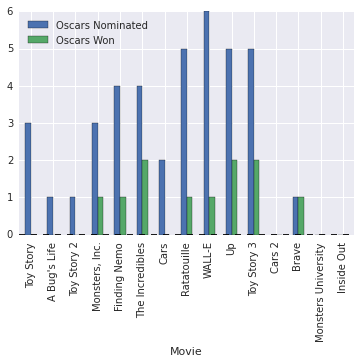

In [10]:
oscars = pd.DataFrame(data=pixar_movies, columns=['Oscars Nominated','Oscars Won'])
oscars.plot(kind='bar')
plt.show()

The bar graph here compares the number of Oscars a movie was nominated for to the number it actually won. WALL-E was nominated for six though won one while The Incredibles was nominated for four and ended up winning two.

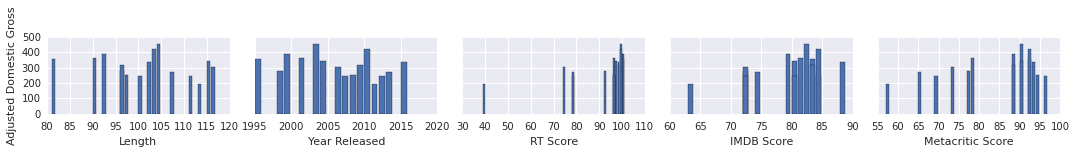

In [11]:
adg_correlate = pd.DataFrame(data=pixar_movies)
ac = sns.PairGrid(data=adg_correlate,x_vars=['Length','Year Released','RT Score','IMDB Score','Metacritic Score'],y_vars=['Adjusted Domestic Gross'],aspect=1.5,size=2)
ac = ac.map(plt.bar)


This PairGrid was made using the Seaborn library while each of the previous graphs in this notebook used Pandas. Seaborn provides another api for drawing statistical graphics. This plot compares the film length, release year, and review scores to the adjusted domestic gross just to see if there's any correlation betwen them at all.